## 資料前置處理

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(x_img_train, y_label_train), \
(x_img_test, y_label_test) = cifar10.load_data()

In [3]:
print(f"train data: images:, {x_img_train.shape} labels: {y_label_train.shape}")
print(f"train data: images:, {x_img_test.shape} labels: {y_label_test.shape}")

train data: images:, (50000, 32, 32, 3) labels: (50000, 1)
train data: images:, (10000, 32, 32, 3) labels: (10000, 1)


In [4]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

## 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(filters = 32,
                 kernel_size = (3, 3),
                 input_shape = (32, 32, 3),
                 activation = 'relu',
                 padding = 'same'))

In [9]:
model.add(Dropout(0.25))

In [10]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [11]:
model.add(Conv2D(filters=64,
                 kernel_size = (3,3),
                 activation = 'relu',
                 padding = 'same'))

In [12]:
model.add(Dropout(0.25))

In [13]:
model.add(MaxPooling2D(pool_size = (2, 2)))

In [14]:
model.add(Flatten())
model.add(Dropout(0.25))

In [15]:
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(rate = 0.25))

In [16]:
model.add(Dense(10, activation = 'softmax'))

In [17]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [18]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [19]:
train_history = model.fit(x_img_train_normalize,
                          y_label_train_OneHot,
                          validation_split = 0.2, 
                          epochs = 10,
                          batch_size = 128,
                          verbose = 2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 114s - loss: 1.5043 - acc: 0.4577 - val_loss: 1.2715 - val_acc: 0.5831
Epoch 2/10
 - 112s - loss: 1.1405 - acc: 0.5936 - val_loss: 1.1128 - val_acc: 0.6388
Epoch 3/10
 - 113s - loss: 0.9835 - acc: 0.6554 - val_loss: 1.0249 - val_acc: 0.6562
Epoch 4/10
 - 112s - loss: 0.8725 - acc: 0.6925 - val_loss: 0.9370 - val_acc: 0.6980
Epoch 5/10
 - 134s - loss: 0.7812 - acc: 0.7242 - val_loss: 0.8692 - val_acc: 0.7115
Epoch 6/10
 - 110s - loss: 0.6959 - acc: 0.7569 - val_loss: 0.8382 - val_acc: 0.7192
Epoch 7/10
 - 112s - loss: 0.6150 - acc: 0.7862 - val_loss: 0.8177 - val_acc: 0.7242
Epoch 8/10
 - 112s - loss: 0.5517 - acc: 0.8059 - val_loss: 0.7669 - val_acc: 0.7425
Epoch 9/10
 - 110s - loss: 0.4788 - acc: 0.8334 - val_loss: 0.8340 - val_acc: 0.7164
Epoch 10/10
 - 111s - loss: 0.4269 - acc: 0.8513 - val_loss: 0.7975 - val_acc: 0.7275


In [ ]:
import matplotlib.pyplot as plt
def show_train_history(train_history,
                       train,
                       validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

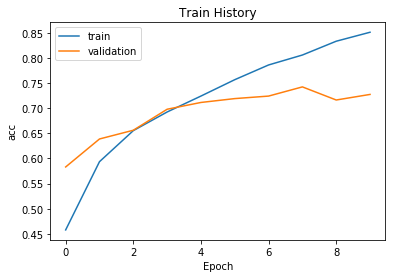

In [21]:
show_train_history(train_history, 'acc', 'val_acc')

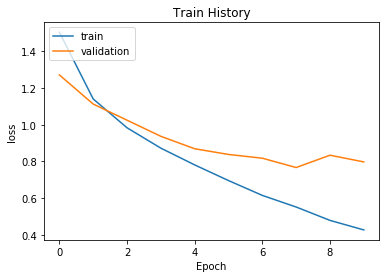

In [22]:
show_train_history(train_history, 'loss', 'val_loss')

In [23]:
scores = model.evaluate(x_img_test_normalize,
                        y_label_test_OneHot,
                        verbose = 0)
scores[1]

0.7231

In [24]:
prediction = model.predict_classes(x_img_test_normalize)

In [25]:
prediction[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1])

In [27]:
def plot_images_labels_prediction(images, 
                                  labels,
                                  prediction,
                                  idx,
                                  num = 10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: 
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, i+1)
        ax.imshow(images[idx], cmap = 'binary')
        title = f"label = {labels[idx]}"
        if len(prediction) > 0:
            title += f", predict = {prediction[idx]}"
            
        ax.set_title(title, fontsize = 12)
        ax.set_xticks([]); ax.set_yticks([])
        idx += 1
    plt.show()

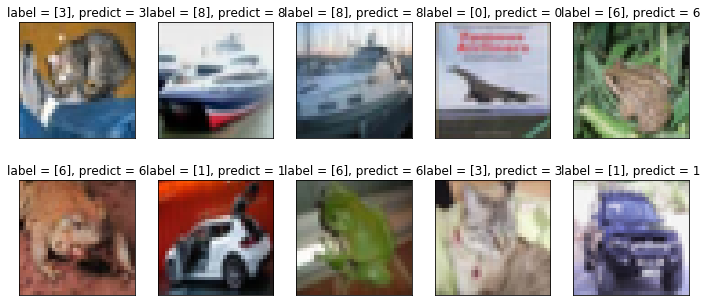

In [28]:
plot_images_labels_prediction(x_img_test, 
                              y_label_test,
                              prediction,
                              0,
                              10)

In [29]:
Predicted_Probability = model.predict(x_img_test_normalize)

In [35]:
def show_Predicted_Probability(y,
                               prediction,
                               x_img,
                               Predicted_Probability,
                               i):
    print(f'label: {label_dict[y[i][0]]} predict {label_dict[prediction[i]]}')
    plt.figure(figsize = (2, 2))
    plt.imshow(np.reshape(x_img_test[i], (32, 32, 3)))
    plt.show()
    for j in range(10):
        print(f"{label_dict[j]} Probability:{Predicted_Probability[i][j]:1.9f}")

In [38]:
label_dict = {0: "airplane", 
              1: "automobile", 
              2: "bird", 
              3: "cat", 
              4: "deer",
              5: "dog",
              6: "frog",
              7: "horse",
              8: "ship",
              9: "truck",
             }

label: cat predict cat


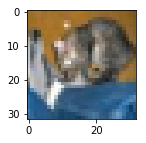

airplane Probability:0.004336688
automobile Probability:0.001308281
bird Probability:0.019585459
cat Probability:0.577527165
deer Probability:0.004560084
dog Probability:0.340306938
frog Probability:0.033807259
horse Probability:0.004987857
ship Probability:0.012676755
truck Probability:0.000903433


In [39]:
show_Predicted_Probability(y_label_test,
                           prediction,
                           x_img_test,
                           Predicted_Probability,
                           0)

label: airplane predict airplane


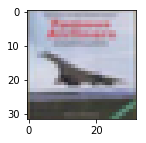

airplane Probability:0.450184673
automobile Probability:0.000858370
bird Probability:0.120108671
cat Probability:0.001240610
deer Probability:0.016153989
dog Probability:0.000094145
frog Probability:0.000144145
horse Probability:0.000016033
ship Probability:0.410836071
truck Probability:0.000363330


In [41]:
show_Predicted_Probability(y_label_test,
                           prediction,
                           x_img_test,
                           Predicted_Probability,
                           3)

In [42]:
prediction.shape

(10000,)

In [43]:
y_label_test.shape

(10000, 1)

In [44]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

In [46]:
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1),
            prediction,
            rownames = ['label'],
            colnames = ['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,777,5,87,8,14,10,17,5,58,19
1,31,781,24,13,2,8,24,2,50,65
2,43,1,709,27,67,50,85,10,8,0
3,17,6,126,461,59,173,135,12,7,4
4,19,1,132,37,672,27,93,9,10,0
5,13,1,88,117,39,647,63,24,3,5
6,4,1,43,22,14,15,895,1,3,2
7,13,0,70,34,90,79,21,689,4,0
8,56,15,30,8,8,10,14,1,851,7


In [47]:
model = Sequential()

In [48]:
model.add(Conv2D(filters = 32,
                 kernel_size = (3,3),
                 input_shape = (32, 32, 3),
                 activation = 'relu',
                 padding = 'same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters = 32,
                 kernel_size = (3,3),
                 activation = 'relu',
                 padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))

In [49]:
model.add(Conv2D(filters = 64,
                 kernel_size = (3,3),
                 activation = 'relu',
                 padding = 'same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters = 64,
                 kernel_size = (3,3),
                 activation = 'relu',
                 padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))

In [50]:
model.add(Conv2D(filters = 128,
                 kernel_size = (3,3),
                 activation = 'relu',
                 padding = 'same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters = 128,
                 kernel_size = (3,3),
                 activation = 'relu',
                 padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))

In [51]:
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(2500, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2500, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation = 'softmax'))

In [54]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
for i in range(10):
    try:
        model.load_weights("SaveModel/cifarCnnModel.h5")
        print("Loading Model is success, Keep training Model")
    except:
        print("Loading Model is failure, train new Model")
    train_history = model.fit(x_img_train_normalize,
                              y_label_train_OneHot,
                              validation_split = 0.2,
                              epochs = 5,
                              batch_size = 300,
                              verbose = 1)
    model.save_weights("SaveModel/cifarCnnModel.h5")
    print("Save model to disk")

Loading Model is failure, train new Model
Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 338s 8ms/step - loss: 1.3240 - acc: 0.5155 - val_loss: 1.3951 - val_acc: 0.4939
Epoch 2/5
40000/40000 [==============================] - 338s 8ms/step - loss: 1.1858 - acc: 0.5741 - val_loss: 1.1759 - val_acc: 0.5751
Epoch 3/5
40000/40000 [==============================] - 342s 9ms/step - loss: 1.0595 - acc: 0.6187 - val_loss: 1.0287 - val_acc: 0.6353
Epoch 4/5
40000/40000 [==============================] - 340s 8ms/step - loss: 0.9611 - acc: 0.6577 - val_loss: 0.9601 - val_acc: 0.6627
Epoch 5/5
40000/40000 [==============================] - 347s 9ms/step - loss: 0.8868 - acc: 0.6846 - val_loss: 0.9022 - val_acc: 0.6853
Save model to disk
Loading Model is success, Keep training Model
Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 344s 9ms/step - loss: 0.8239 - acc: 0.7058 - val_lo